In [1]:
# Set up sys.path and import needed packages.
import _preamble

import numpy as np
import matplotlib.pyplot as plt

from pmte import tapers
import helpers

In [2]:
# Set basic parameters.
N = 32  # Length of signal
W = 7 / 32  # Bandwidth

In [3]:
# Define a mask of length N that includes all the point in the signal.
mask = np.full((N,), True)

# Get a function handle for the linear operator that performs the concentration
# operation. This is the operator T^{Ω,W} defined in eq. (3.8) of the paper.
op = tapers.concentration_op(mask, W)

In [4]:
# Convert the linear operator to an N×N matrix by applying it to the identity
# matrix.
A = op(np.eye(N))

# Get the eigenvalues and sort them in descending order.
D = np.linalg.eigvalsh(A)
D = np.sort(D)[::-1]

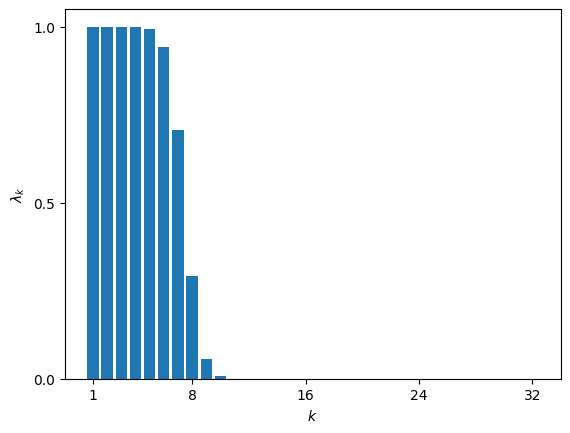

In [5]:
# Plot Figure 3 in the paper.
ks = np.arange(1, len(D) + 1)

plt.bar(ks, D)
plt.xticks([1, 8, 16, 24, 32])
plt.yticks([0, 0.5, 1])
plt.xlabel("$k$")
plt.ylabel("$\lambda_k$")
plt.show(block=False)

---

In [6]:
# Save data for figure generation.
helpers.save_table("spectrum", ks, D)